### polynomial Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Text(0, 0.5, 'Y dataset')

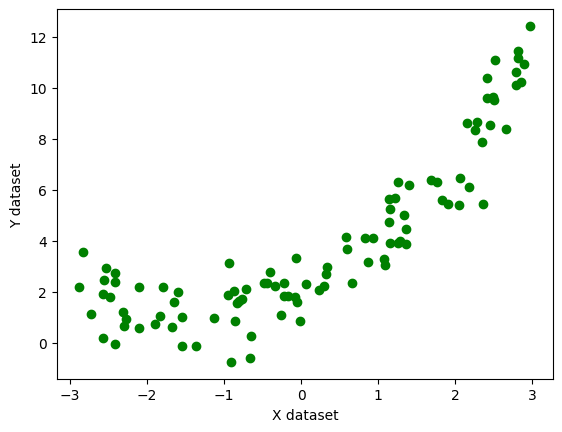

In [2]:
X= 6 * np.random.rand(100,1) - 3
y= 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)
## quadratic equation used - y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y,color='g')
plt.xlabel("X dataset")
plt.ylabel("Y dataset")

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
## implementing simple linear Regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [5]:
regression.fit(X_train,y_train)

LinearRegression()

In [6]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regression.predict(X_test))
print(score)

-0.180534936868888


Text(0, 0.5, 'Y')

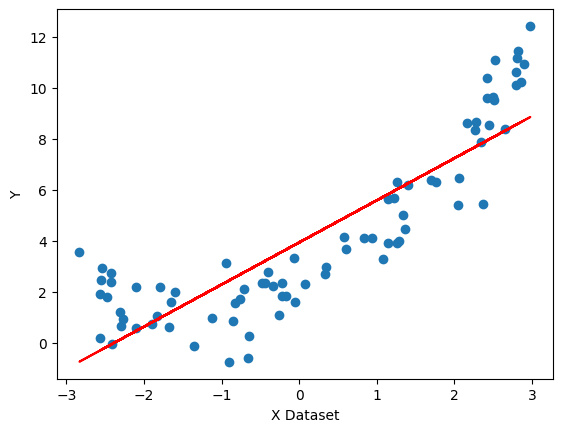

In [7]:
## lets visualize the model 
plt.plot(X_train,regression.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel('X Dataset')
plt.ylabel("Y")

In [8]:
# applying polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [9]:
X_train_poly

array([[ 1.00000000e+00, -1.67578222e+00,  2.80824606e+00,
        -4.70600882e+00],
       [ 1.00000000e+00,  1.21836209e+00,  1.48440618e+00,
         1.80854421e+00],
       [ 1.00000000e+00, -2.10642777e+00,  4.43703794e+00,
        -9.34629993e+00],
       [ 1.00000000e+00,  1.14685497e+00,  1.31527632e+00,
         1.50843119e+00],
       [ 1.00000000e+00,  2.26167282e+00,  5.11516395e+00,
         1.15688273e+01],
       [ 1.00000000e+00, -4.85046242e-01,  2.35269857e-01,
        -1.14116760e-01],
       [ 1.00000000e+00, -1.12830996e+00,  1.27308337e+00,
        -1.43643264e+00],
       [ 1.00000000e+00, -8.25718888e-01,  6.81811682e-01,
        -5.62984784e-01],
       [ 1.00000000e+00,  2.85437177e+00,  8.14743819e+00,
         2.32558176e+01],
       [ 1.00000000e+00, -8.56197192e-01,  7.33073632e-01,
        -6.27655586e-01],
       [ 1.00000000e+00,  1.25537524e+00,  1.57596698e+00,
         1.97842992e+00],
       [ 1.00000000e+00,  1.76253577e+00,  3.10653233e+00,
      

In [10]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)

In [11]:
print(score)

0.6971220002264094


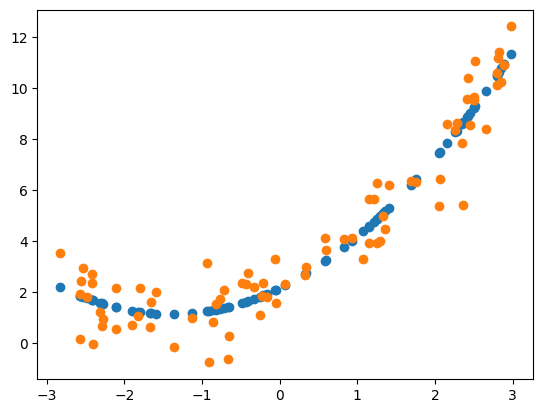

In [12]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [13]:
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)

In [14]:
## prediction of new dataset
X_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly=poly.transform(X_new)
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

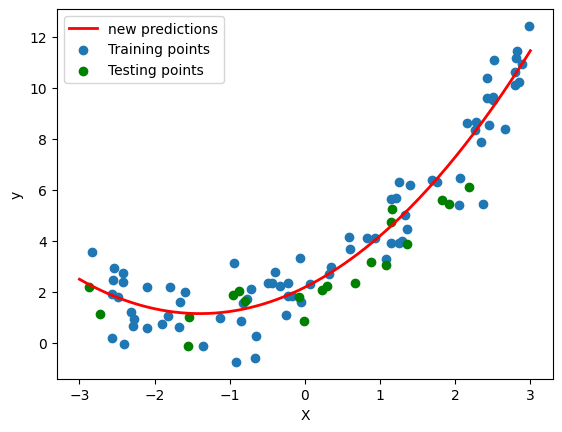

In [ ]:
y_new=regression.predict(x_new_poly)
plt.plot(X_new,y_new,'r-',linewidth=2,label="new predictions")
plt.scatter(X_train,y_train,label='Training points')

plt.scatter(X_test,y_test,color='g',label="Testing points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### pipeline concepts

In [21]:
from sklearn.pipeline import Pipeline

In [22]:
def poly_regression(degree):
    X_new=np.linspace(-3,3,200).reshape(200,1)
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ('Poly features',poly_features),
        ('lin_reg',lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## polynomial and fit of linear regression
    y_pred_new = poly_regression.predict(X_new)
    ## plotting
    plt.plot(X_new,y_pred_new,color='r',label='degree')
    plt.scatter(X_train,y_train,color='g',label='Training points')
    plt.scatter(X_test,y_test,color='b',label='test points')
    plt.legend(loc="upper left")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()



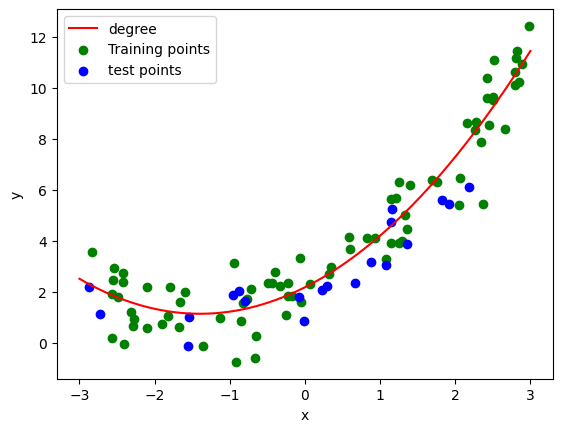

In [28]:
poly_regression(2)